In [ ]:
import pandas as pd

df = pd.read_csv('ctrip_3000.csv')
df

,poiId,poiName,commentCount,commentScore,districtName,zoneName,distanceStr,coverImageUrl,openStatus,latitude,longitude,detailUrl
0,134029217,史努比乐园,315,4.7,济州市,城山日出峰/表善面,距市中心23.3km,https://dimg04.c-ctrip.com/images/1lo0j12000fm...,18:00闭园,33.444196,126.778305,https://you.ctrip.com/sight/jeju1446512/134029...
1,81803,牛岛,1379,4.7,济州市,城山日出峰/表善面,距市中心38.8km,https://dimg04.c-ctrip.com/images/100w1f000001...,NaN,33.504298,126.954048,https://you.ctrip.com/sight/jeju1446512/25765....
2,10759495,乱打秀(济州剧场),633,4.7,济州市,东门市场/济州市政府,距市中心6.0km,https://dimg04.c-ctrip.com/images/0101e12000as...,16:30开园,33.445597,126.547558,https://you.ctrip.com/sight/jeju1446512/140813...
3,131170473,ARTE全沉浸式美术馆-韩国济州,355,4.8,济州市,涯月邑,距市中心21.1km,https://dimg04.c-ctrip.com/images/0100612000f6...,NaN,33.396475,126.344614,https://you.ctrip.com/sight/jeju1446512/571893...
4,23909829,济州Ecoland生态主题乐园,400,4.5,济州市,咸德/朝天/旧左,距市中心13.2km,https://dimg04.c-ctrip.com/images/100f1f000001...,17:00闭园,33.455530,126.668187,https://you.ctrip.com/sight/jeju1446512/178942...
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,136837021,5·18 현황조각 및 추모승화공간,0,0.0,光州,NaN,NaN,https://dimg04.c-ctrip.com/images/fd/tg/g2/M02...,NaN,35.157393,126.857818,https://you.ctrip.com/sight/gwangju433/1368370...
2996,136837051,염색장 정관채 전수교육관,0,0.0,罗州市,NaN,NaN,https://dimg04.c-ctrip.com/images/fd/tg/g1/M08...,18:00闭园,34.997241,126.634259,https://you.ctrip.com/sight/najusi1595529/1368...
2997,136837167,구례관광특구,0,0.0,求礼郡,NaN,NaN,https://dimg04.c-ctrip.com/images/fd/tg/g1/M06...,NaN,35.202857,127.526397,https://you.ctrip.com/sight/gurye120565/136837...
2998,136837224,Han Hee Won Art Museum,0,0.0,光州,NaN,NaN,https://dimg04.c-ctrip.com/images/fd/tg/g1/M06...,NaN,35.141078,126.914141,https://you.ctrip.com/sight/gwangju433/1368372...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   poiId          3000 non-null   int64  
 1   poiName        3000 non-null   object 
 2   commentCount   3000 non-null   int64  
 3   commentScore   3000 non-null   float64
 4   districtName   3000 non-null   object 
 5   zoneName       1326 non-null   object 
 6   distanceStr    1255 non-null   object 
 7   coverImageUrl  3000 non-null   object 
 8   openStatus     543 non-null    object 
 9   latitude       3000 non-null   float64
 10  longitude      3000 non-null   float64
 11  detailUrl      3000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 281.4+ KB


In [ ]:
import pandas as pd
import sqlite3

# DataFrame을 SQLite DB로 저장
conn = sqlite3.connect('poi_data.db')
df.to_sql('poi', conn, if_exists='replace', index=False)
conn.close()

# SQLite DB에서 DataFrame으로 불러오기
conn = sqlite3.connect('poi_data.db')
df = pd.read_sql_query("SELECT * FROM poi", conn)
conn.close()

In [ ]:
import pandas as pd
import json
from openai import OpenAI
from tqdm import tqdm
tqdm.pandas()

# OpenAI 클라이언트 초기화

OPENAI_API_KEY = 'api key' # key 넣기
# client = OpenAI()
client = OpenAI(api_key=OPENAI_API_KEY)
client

In [ ]:
# !pip install openai

In [ ]:
# 데이터베이스 설정
db_name = 'poi_database.db'
table_name = 'poi_data'
columns_to_translate = ['poiName', 'districtName', 'zoneName', 'distanceStr']

# 데이터베이스에 _ko 컬럼 추가
def add_translation_columns():
    conn = sqlite3.connect(db_name)
    cur = conn.cursor()

    # 테이블 정보 조회
    cur.execute(f"PRAGMA table_info({table_name})")
    existing_columns = [row[1] for row in cur.fetchall()]

    # 필요한 _ko 컬럼 추가
    for col in columns_to_translate:
        translated_col = f"{col}_ko"
        if translated_col not in existing_columns:
            alter_query = f"ALTER TABLE {table_name} ADD COLUMN {translated_col} TEXT"
            cur.execute(alter_query)
            print(f"{translated_col} 컬럼 추가 완료.")

    conn.commit()
    conn.close()

# 번역 함수 (1행씩 처리)
def translate_and_update(row):
    try:
        # 번역할 텍스트를 json 형태로 구성 (NULL이 아닌 경우만)
        to_translate = {col: row[col] for col in columns_to_translate if pd.notna(row[col])}

        if not to_translate:
            return

        # API 요청
        completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {
                    "role": "user",
                    "content": f"Translate the following Chinese place names to Korean. Return the result as JSON with each key suffixed by '_ko': {json.dumps(to_translate, ensure_ascii=False)}"
                }
            ],
            max_tokens=300,
            temperature=0.7
        )

        # 마크다운 제거 및 JSON 파싱
        response_text = completion.choices[0].message.content.strip()

        if response_text.startswith("```json"):
            response_text = response_text.replace("```json", "").replace("```", "").strip()

        # JSON 파싱
        response_json = json.loads(response_text)

        # 번역된 데이터베이스 업데이트
        update_query = f"""
        UPDATE {table_name}
        SET {', '.join([f"{key} = ?" for key in response_json.keys()])}
        WHERE poiId = ?
        """
        values = list(response_json.values()) + [row['poiId']]

        conn = sqlite3.connect(db_name)
        cur = conn.cursor()
        cur.execute(update_query, values)
        conn.commit()
        conn.close()

        print(f"poiId {row['poiId']} 업데이트 완료.")

    except Exception as e:
        print(f"Error at poiId {row['poiId']}: {e}")

In [ ]:
import sqlite3

# SQLite 데이터베이스 연결
conn = sqlite3.connect("data.db")

# 데이터베이스에 존재하는 테이블 확인
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(query).fetchall()

print("현재 데이터베이스의 테이블 목록:", tables)

conn.close()

현재 데이터베이스의 테이블 목록: []


In [ ]:
# 데이터베이스에 필요한 컬럼 추가
add_translation_columns()

OperationalError: no such table: poi_data

In [4]:
# prompt: 같은 경로의 ga_innercircle.csv 파일을 불러올 것

import pandas as pd

# ga_innercircle.csv 파일을 DataFrame으로 읽어옵니다.
df_ga = pd.read_csv('ga_innercircle.csv')

# DataFrame 내용 출력
df_ga

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
0,20241113,1731423960541000,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,1,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1,20241113,1731423963707001,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,2,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
2,20241113,1731423963707002,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,3,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
3,20241113,1731423963707003,scroll,"{\n ""event_params"": [{\n ""key"": ""percent_s...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,4,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
4,20241113,1731423964025004,scroll,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,5,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20241113,1731488942876023,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,24,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1436,20241113,1731488957721029,sign_up_step_click,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,30,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1437,20241113,1731488957753030,user_engagement,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,31,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1438,20241113,1731488993165034,screen_view,"{\n ""event_params"": [{\n ""key"": ""engaged_s...",1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,35,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"


In [5]:
df_ga.shape

(1440, 30)

In [6]:
df_ga.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,event_dimensions,ecommerce,items,collected_traffic_source,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,session_traffic_source_last_click,publisher
0,20241113,1731423960541000,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,1,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
1,20241113,1731423963707001,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,2,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
2,20241113,1731423963707002,scroll,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,3,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
3,20241113,1731423963707003,scroll,"{\n ""event_params"": [{\n ""key"": ""percent_s...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,4,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
4,20241113,1731423964025004,scroll,"{\n ""event_params"": [{\n ""key"": ""firebase_...",1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,...,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}",True,5,NaN,NaN,"{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"


In [7]:
df_ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   event_date                         1440 non-null   int64  
 1   event_timestamp                    1440 non-null   int64  
 2   event_name                         1440 non-null   object 
 3   event_params                       1440 non-null   object 
 4   event_previous_timestamp           1301 non-null   float64
 5   event_value_in_usd                 0 non-null      float64
 6   event_bundle_sequence_id           1440 non-null   int64  
 7   event_server_timestamp_offset      1440 non-null   int64  
 8   user_id                            834 non-null    float64
 9   user_pseudo_id                     1440 non-null   object 
 10  privacy_info                       1440 non-null   object 
 11  user_properties                    1440 non-null   objec

In [8]:
# 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
# prompt: df_ga 의 수치형데이터와 범주형데이터의 기초 기술통계 print 대신  display

# 수치형 데이터의 기술통계
display(df_ga.describe())

# 범주형 데이터의 기술통계 (빈도수 등)
display(df_ga.describe(include='object'))

,event_date,event_timestamp,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_first_touch_timestamp,stream_id,batch_event_index,batch_page_id,batch_ordering_id
count,1440.0,1.440000e+03,1.301000e+03,0.0,1440.000000,1.440000e+03,834.000000,1.440000e+03,1.440000e+03,1440.000000,0.0,0.0
mean,20241113.0,1.731477e+15,1.730924e+15,NaN,153.092361,6.993021e+05,115513.395683,1.725835e+15,2.330073e+09,11.627778,NaN,NaN
std,0.0,2.346659e+10,5.068038e+12,NaN,205.863487,5.300954e+06,38964.994957,1.793490e+13,1.288719e+04,13.098082,NaN,NaN
min,20241113.0,1.731424e+15,1.621842e+15,NaN,2.000000,1.090000e+02,19947.000000,1.614087e+15,2.330053e+09,1.000000,NaN,NaN
25%,20241113.0,1.731466e+15,1.731458e+15,NaN,7.000000,2.268280e+05,117468.000000,1.728823e+15,2.330053e+09,3.000000,NaN,NaN
50%,20241113.0,1.731484e+15,1.731479e+15,NaN,38.000000,2.991165e+05,136163.000000,1.731060e+15,2.330081e+09,6.000000,NaN,NaN
75%,20241113.0,1.731495e+15,1.731495e+15,NaN,468.000000,3.849370e+05,136163.000000,1.731466e+15,2.330081e+09,16.000000,NaN,NaN
max,20241113.0,1.731510e+15,1.731510e+15,NaN,523.000000,8.248770e+07,140171.000000,1.731509e+15,2.330081e+09,76.000000,NaN,NaN


,event_name,event_params,user_pseudo_id,privacy_info,user_properties,user_ltv,device,geo,app_info,traffic_source,platform,event_dimensions,ecommerce,items,collected_traffic_source,session_traffic_source_last_click,publisher
count,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440
unique,32,1440,103,1,932,2,83,31,5,6,2,1,2,8,2,7,1
top,screen_view,"{\n ""event_params"": [{\n ""key"": ""ga_sessio...",8AD0EDA3E1FF43669A39203848369A51,"{\n ""privacy_info"": {\n ""analytics_storage...","{\n ""user_properties"": [{\n ""key"": ""ga_ses...","{\n ""user_ltv"": null\n}","{\n ""device"": {\n ""category"": ""mobile"",\n ...","{\n ""geo"": {\n ""city"": ""Seoul"",\n ""coun...","{\n ""app_info"": {\n ""id"": ""com.fastcampus....","{\n ""traffic_source"": {\n ""name"": ""(direct...",IOS,"{\n ""event_dimensions"": null\n}","{\n ""ecommerce"": null\n}","{\n ""items"": []\n}","{\n ""collected_traffic_source"": null\n}","{\n ""session_traffic_source_last_click"": {\n ...","{\n ""publisher"": null\n}"
freq,500,1,350,1440,23,1431,350,701,1026,1049,1026,1440,1433,1433,1438,1062,1440


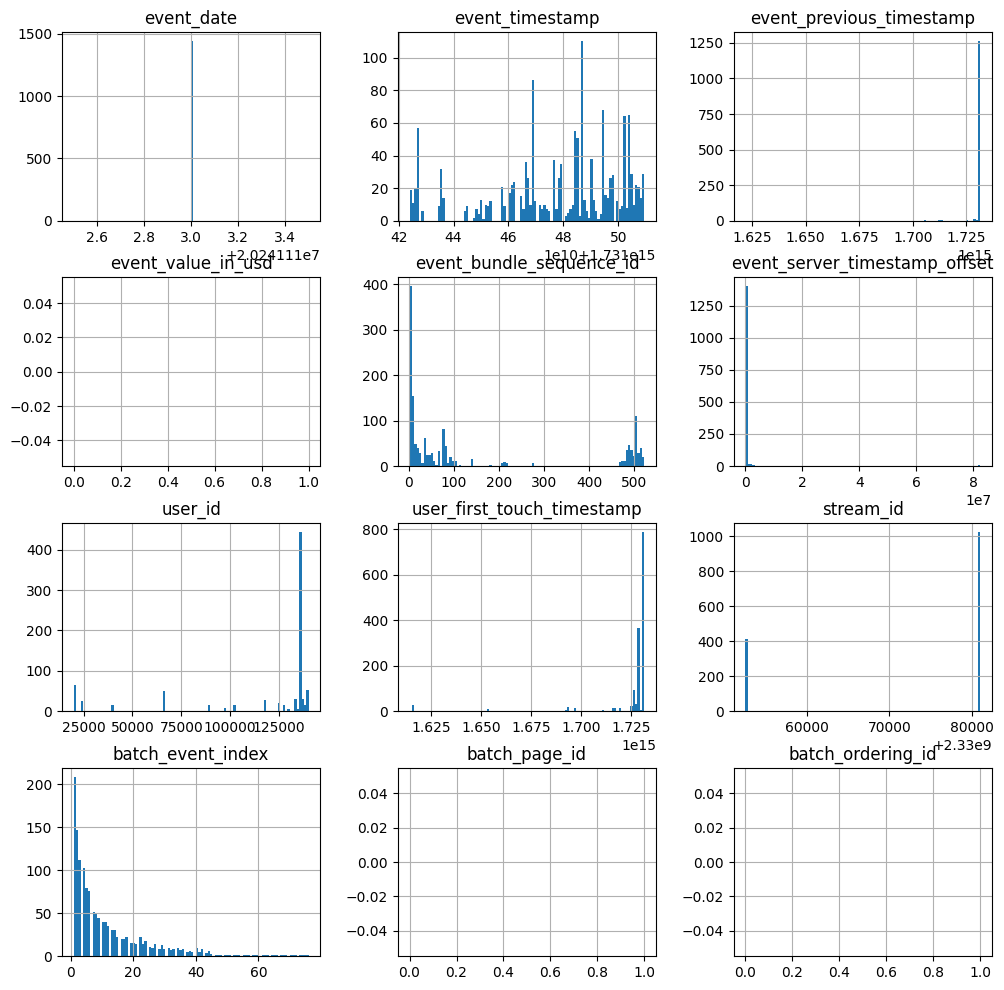

In [11]:
# 전체 수치변수에 대해 판다스를 활용해서 코드 한줄로 히스토그램 생성
df_ga.hist(figsize=(12, 12), bins=100); # 마지막에 세미콜론하면 깔끔하게 나옴

In [12]:
df_ga['event_name'].value_counts()

,count
event_name,
screen_view,500
user_engagement,386
sign_up_step_click,127
scroll,100
style_recommend_click,66
session_start,41
fnb_tab_click,38
main_content_click,37
eot_start_click,25


In [13]:
print(df_ga.loc[0, "event_params"])

{
  "event_params": [{
    "key": "ga_session_number",
    "value": {
      "string_value": null,
      "int_value": "171",
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "ga_session_id",
    "value": {
      "string_value": null,
      "int_value": "1731423503",
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "firebase_screen_class",
    "value": {
      "string_value": "MainActivity",
      "int_value": null,
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "firebase_event_origin",
    "value": {
      "string_value": "auto",
      "int_value": null,
      "float_value": null,
      "double_value": null
    }
  }, {
    "key": "firebase_screen_id",
    "value": {
      "string_value": null,
      "int_value": "-7731334501732282272",
      "float_value": null,
      "double_value": null
    }
  }]
}


In [14]:
import json
import pandas as pd
import numpy as np

def parse_ga4_style_json(json_str):
    """
    1) JSON 문자열인 json_str을 파싱
    2) GA4 'key'/'value' 구조([{ "key": k, "value": {...}}])를 찾으면 -> {k: 실제값}으로 추출
    3) 일반 딕셔너리({ "some_key": some_val }) 구조도 최상위 key-value만 추출
    4) key-value를 담은 dict를 리턴 (실패 시 빈 dict)
    """
    # 예외처리: JSON 파싱
    try:
        parsed = json.loads(json_str)
    except:
        return {}

    # 결과를 담을 딕셔너리
    result = {}

    # 1) 리스트 형태(["event_params": [...]] 등) 안에서 GA4 style param 찾기
    if isinstance(parsed, dict):
        # 예: {"event_params": [{"key": "...", "value": {...}}, ...], "other_key": {...}}
        for top_key, top_val in parsed.items():

            # (A) 만약 리스트라면 → GA4 파라미터(또는 유사 구조) 가능성
            if isinstance(top_val, list):
                for item in top_val:
                    if isinstance(item, dict) and "key" in item and "value" in item:
                        # item: {"key": "...", "value": {...}}
                        param_key = item["key"]
                        param_val = item["value"]

                        # 실제 값 추출 (int_value, string_value, float_value, double_value 중 유효한 것)
                        if param_val.get("int_value") is not None:
                            val = int(param_val["int_value"])
                        elif param_val.get("string_value") is not None:
                            val = param_val["string_value"]
                        elif param_val.get("float_value") is not None:
                            val = float(param_val["float_value"])
                        elif param_val.get("double_value") is not None:
                            val = float(param_val["double_value"])
                        else:
                            val = None

                        result[param_key] = val

            # (B) 딕셔너리 형태라면(예: {"publisher": null}처럼 단일 key-value) → 최상위 키/값을 넣어줌
            elif isinstance(top_val, dict):
                # 간단히 top_val를 평탄화해서 result에 합침 (중첩은 추가 구현 필요)
                for inner_k, inner_v in top_val.items():
                    # key가 "key"이고 value가 {...} 이런 GA4 형식이 아닌 한, 그냥 key-value로 저장
                    result[f"{top_key}_{inner_k}"] = inner_v

            # (C) top_val이 숫자, 문자열, None 등 스칼라일 경우
            else:
                result[top_key] = top_val

    return result


def flatten_ga4_json_columns(df_ga):
    """
    1) df_ga 내에서 '{'로 시작하는 문자열이 있는 컬럼을 'JSON 컬럼'으로 판단
    2) 각 JSON 컬럼을 parse_ga4_style_json으로 변환 -> 여러 컬럼으로 펼침
    3) 펼쳐진 컬럼을 원본 df_ga와 병합 후, 기존 JSON 컬럼은 삭제
    4) 최종 df_ga 반환
    """
    json_cols = []

    # 1) 우선, '{'로 시작하는 문자열이 있는 컬럼 식별
    for col in df_ga.columns:
        # Series를 문자열화한 뒤 '{'로 시작하는지(any) 확인
        if df_ga[col].astype(str).str.startswith('{').any():
            json_cols.append(col)

    # 2) 각 JSON 컬럼별로 파싱 & 펼치기
    expanded_dfs = []
    for col in json_cols:
        # parse 결과 -> dict 형태가 row별로 생김
        parsed_series = df_ga[col].astype(str).apply(parse_ga4_style_json)

        # dict -> 데이터프레임으로 (row별 컬럼 확장)
        expanded_df_ga = pd.json_normalize(parsed_series)

        # 혹시 컬럼 충돌 방지를 위해 '원본컬럼명.새키' 형태로 명명
        expanded_df_ga.columns = [f"{col}.{c}" for c in expanded_df_ga.columns]

        expanded_dfs.append(expanded_df_ga)

    # 3) 확장된 DF들을 모두 수평 결합(concat) -> 원본 df_ga와 합치기
    if expanded_dfs:
        expanded_all = pd.concat([df_ga] + expanded_dfs, axis=1)
    else:
        expanded_all = df_ga.copy()

    # 4) 기존 JSON 컬럼은 삭제
    expanded_all.drop(columns=json_cols, inplace=True)

    return expanded_all


# 예시: 이미 df_ga가 존재한다고 가정.
# 변환 수행
df_ga_flattened = flatten_ga4_json_columns(df_ga)

print("=== Before ===")
print(df_ga)
print("\n=== After Flattening ===")
print(df_ga_flattened)

=== Before ===
      event_date   event_timestamp          event_name  \
0       20241113  1731423960541000         screen_view   
1       20241113  1731423963707001              scroll   
2       20241113  1731423963707002              scroll   
3       20241113  1731423963707003              scroll   
4       20241113  1731423964025004              scroll   
...          ...               ...                 ...   
1435    20241113  1731488942876023  sign_up_step_click   
1436    20241113  1731488957721029  sign_up_step_click   
1437    20241113  1731488957753030     user_engagement   
1438    20241113  1731488993165034         screen_view   
1439    20241113  1731489003965041              scroll   

                                           event_params  \
0     {\n  "event_params": [{\n    "key": "ga_sessio...   
1     {\n  "event_params": [{\n    "key": "ga_sessio...   
2     {\n  "event_params": [{\n    "key": "ga_sessio...   
3     {\n  "event_params": [{\n    "key": "percent_s

In [29]:
df_ga_flattened

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,...,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_version,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_cost_structure,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_name,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.rendering_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.site_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.site_name,publisher.publisher
0,20241113,1731423960541000,screen_view,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1,20241113,1731423963707001,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
2,20241113,1731423963707002,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
3,20241113,1731423963707003,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
4,20241113,1731423964025004,scroll,1.731424e+15,NaN,468,1115394,39827.0,154e3be9cecd0af9307e920fcc4f9476,1717068513956000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20241113,1731488942876023,sign_up_step_click,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1436,20241113,1731488957721029,sign_up_step_click,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1437,20241113,1731488957753030,user_engagement,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None
1438,20241113,1731488993165034,screen_view,1.731489e+15,NaN,5,344743,NaN,52A8199D4B844812937ECC2627026D0C,1731488838525000,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),None


In [30]:
columns_list = df_ga_flattened.columns
print(columns_list)

num_columns = len(df_ga_flattened.columns)
print(f"Total columns: {num_columns}")

Index(['event_date', 'event_timestamp', 'event_name',
       'event_previous_timestamp', 'event_value_in_usd',
       'event_bundle_sequence_id', 'event_server_timestamp_offset', 'user_id',
       'user_pseudo_id', 'user_first_touch_timestamp',
       ...
       'session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type',
       'session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type_id',
       'session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_version',
       'session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_id',
       'session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_cost_structure',
       'session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_name',
       'session_traffic_source_last_click.session_traffic_source_last_click_cm360_cam

In [ ]:
# prompt: 판다스의 데이터프레임 모든 컬럼 출력하기

import pandas as pd
from IPython.display import display
import json
import numpy as np

# ... (Your existing code)

# Display all columns of the DataFrame
pd.set_option("display.max_columns", None)  # Show all columns
display(df_ga_flattened)

,event_date,event_timestamp,event_name,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,user_first_touch_timestamp,stream_id,platform,is_active_user,batch_event_index,batch_page_id,batch_ordering_id,event_params.ga_session_number,event_params.ga_session_id,event_params.firebase_screen_class,event_params.firebase_event_origin,event_params.firebase_screen_id,event_params.percent_scrolled,event_params.engagement_time_msec,event_params.entrances,event_params.firebase_conversion,event_params.channel,event_params.engaged_session_event,event_params.message_type,event_params.firebase_previous_class,event_params.firebase_screen,event_params.firebase_previous_id,event_params.session_engaged,event_params.tab_name,event_params.firebase_previous_screen,event_params.style_name,event_params.click_section,event_params.click_text,event_params.search_term,event_params.currency,event_params.platform,event_params.product_name,event_params.button_type,event_params.item_list_name,event_params.step,event_params.brand_name,event_params.withdrawal_reason,event_params.previous_app_version,event_params.previous_os_version,event_params.debug_event,event_params.campaign,event_params.source,event_params.campaign_info_source,event_params.error_value,event_params.firebase_error,event_params.dynamic_link_accept_time,event_params.dynamic_link_link_name,event_params.content_title,event_params.category,privacy_info.privacy_info_analytics_storage,privacy_info.privacy_info_ads_storage,privacy_info.privacy_info_uses_transient_token,user_properties.na_face_type,user_properties.na_gender,user_properties.na_body_type,user_properties.ga_session_id,user_properties.na_age,user_properties.na_shoulder,user_properties.ga_session_number,user_properties.na_bottom,user_properties.na_thigh,user_properties.na_middle,user_properties.na_job,user_properties.na_skin_type,user_properties.na_waist,user_properties.first_open_time,user_properties.na_top,user_properties.na_height,user_properties.na_weight,user_properties.color1_with_priority,user_properties.color2_with_priority,user_properties.eot_height,user_properties.color3_with_priority,user_properties._ltv_KRW,user_properties.height,user_properties.na_job_extra,user_ltv.user_ltv,user_ltv.user_ltv_revenue,user_ltv.user_ltv_currency,device.device_category,device.device_mobile_brand_name,device.device_mobile_model_name,device.device_mobile_marketing_name,device.device_mobile_os_hardware_model,device.device_operating_system,device.device_operating_system_version,device.device_vendor_id,device.device_advertising_id,device.device_language,device.device_is_limited_ad_tracking,device.device_time_zone_offset_seconds,device.device_browser,device.device_browser_version,device.device_web_info,geo.geo_city,geo.geo_country,geo.geo_continent,geo.geo_region,geo.geo_sub_continent,geo.geo_metro,app_info.app_info_id,app_info.app_info_version,app_info.app_info_install_store,app_info.app_info_firebase_app_id,app_info.app_info_install_source,traffic_source.traffic_source_name,traffic_source.traffic_source_medium,traffic_source.traffic_source_source,traffic_source.traffic_source,event_dimensions.event_dimensions,ecommerce.ecommerce,ecommerce.ecommerce_total_item_quantity,ecommerce.ecommerce_purchase_revenue_in_usd,ecommerce.ecommerce_purchase_revenue,ecommerce.ecommerce_refund_value_in_usd,ecommerce.ecommerce_refund_value,ecommerce.ecommerce_shipping_value_in_usd,ecommerce.ecommerce_shipping_value,ecommerce.ecommerce_tax_value_in_usd,ecommerce.ecommerce_tax_value,ecommerce.ecommerce_unique_items,ecommerce.ecommerce_transaction_id,collected_traffic_source.collected_traffic_source,collected_traffic_source.collected_traffic_source_manual_campaign_id,collected_traffic_source.collected_traffic_source_manual_campaign_name,collected_traffic_source.collected_traffic_source_manual_source,collected_traffic_source.collected_traffic_source_manual_medium,collected_traffic_source.collected_traffic

In [34]:
# 각 컬럼별 Null 값 비율 확인
null_ratio = df_ga_flattened.isnull().mean().sort_values(ascending=False)

# Null 비율이 90% 이상인 컬럼 리스트
drop_cols = null_ratio[null_ratio > 0.9].index.tolist()

# 불필요한 컬럼 제거
df_ga_filtered = df_ga_flattened.drop(columns=drop_cols)

print(f"🔹 제거된 컬럼 개수: {len(drop_cols)}개")
print(f"🔹 남은 컬럼 개수: {df_ga_filtered.shape[1]}개")

🔹 제거된 컬럼 개수: 81개
🔹 남은 컬럼 개수: 103개


In [35]:
# 컬럼명 중복 여부 확인
print(df_ga_filtered.columns[df_ga_filtered.columns.duplicated()])

Index([], dtype='object')


<ipython-input-36-31ee3e1a1604>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette="coolwarm")


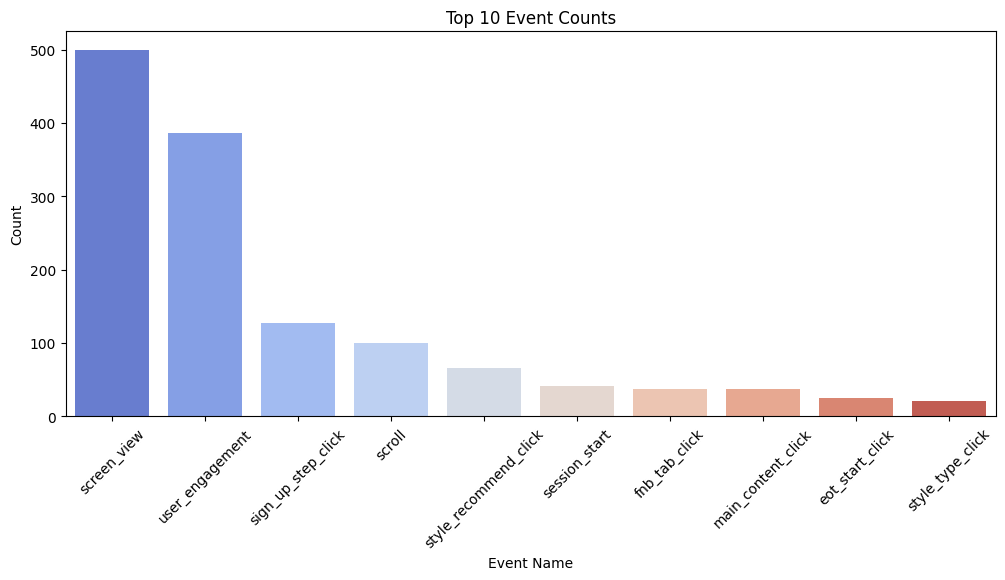

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이벤트 발생 빈도 분석
event_counts = df_ga_filtered['event_name'].value_counts().head(10)  # 상위 10개 이벤트
plt.figure(figsize=(12, 5))
sns.barplot(x=event_counts.index, y=event_counts.values, palette="coolwarm")
plt.title("Top 10 Event Counts")
plt.xlabel("Event Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-37-0538c10e87bf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funnel_conversion.index, y=funnel_conversion.values, palette="viridis")


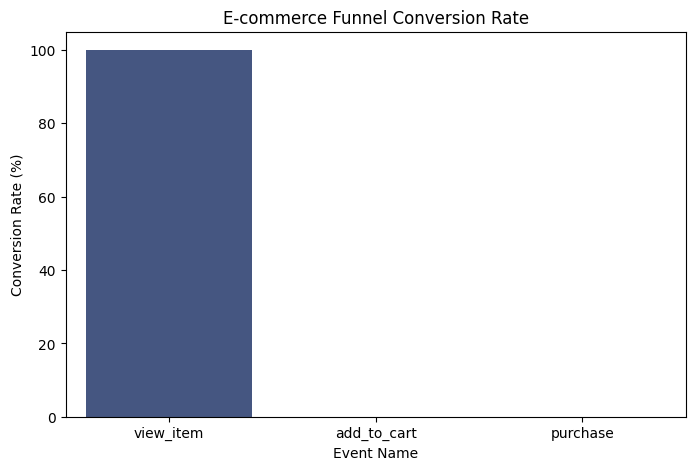

In [37]:
# 구매 퍼널 단계별 이벤트 수
funnel_events = ['view_item', 'add_to_cart', 'purchase']
funnel_counts = df_ga_filtered['event_name'].value_counts().reindex(funnel_events, fill_value=0)

# 전환율 계산
funnel_conversion = funnel_counts / funnel_counts.max() * 100  # 구매 기준 100%
plt.figure(figsize=(8, 5))
sns.barplot(x=funnel_conversion.index, y=funnel_conversion.values, palette="viridis")
plt.title("E-commerce Funnel Conversion Rate")
plt.xlabel("Event Name")
plt.ylabel("Conversion Rate (%)")
plt.show()

In [46]:
keyword = "device"  # 찾고 싶은 키워드
matching_cols = [col for col in df_ga_filtered.columns if keyword.lower() in col.lower()]
print(matching_cols)

['device.device_category', 'device.device_mobile_brand_name', 'device.device_mobile_model_name', 'device.device_mobile_marketing_name', 'device.device_mobile_os_hardware_model', 'device.device_operating_system', 'device.device_operating_system_version', 'device.device_vendor_id', 'device.device_language', 'device.device_is_limited_ad_tracking', 'device.device_time_zone_offset_seconds']


<ipython-input-48-a5ad9d3ef8e6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_category_counts.index, y=device_category_counts.values, palette="coolwarm")


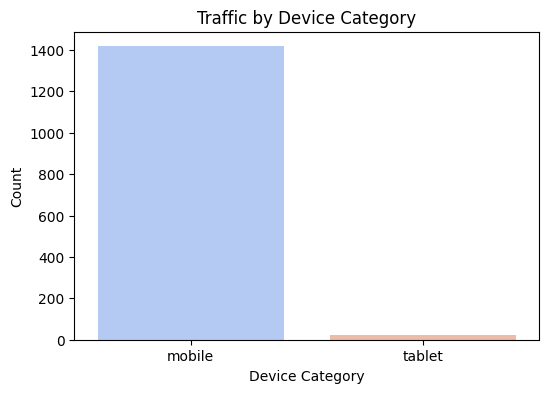

In [48]:
#  모바일 vs PC 트래픽 비교 (device.device_category)
device_category_counts = df_ga_filtered['device.device_category'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=device_category_counts.index, y=device_category_counts.values, palette="coolwarm")
plt.title("Traffic by Device Category")
plt.xlabel("Device Category")
plt.ylabel("Count")
plt.show()

<ipython-input-50-d77c8e0e2253>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="Blues_r")


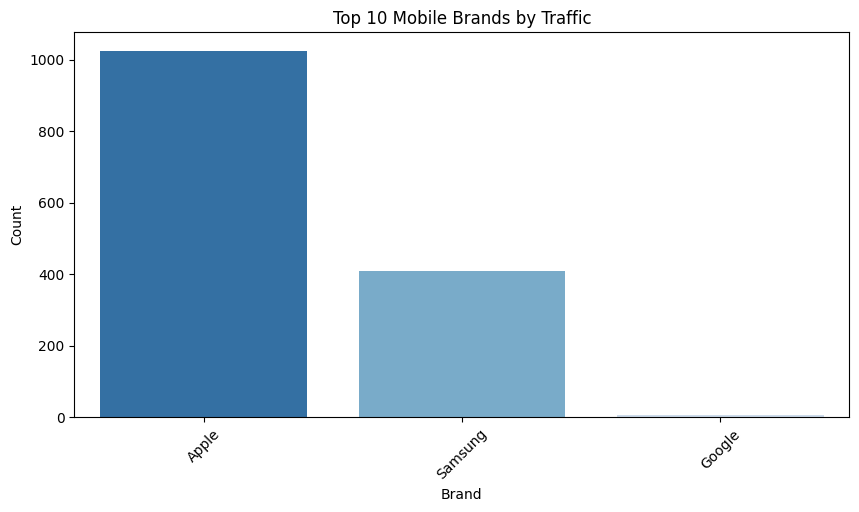

In [50]:
#  브랜드별 사용자 비율 분석

brand_counts = df_ga_filtered['device.device_mobile_brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="Blues_r")
plt.title("Top 10 Mobile Brands by Traffic")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [51]:
geo_cols = [col for col in df_ga_filtered.columns if "geo" in col.lower()]
print(geo_cols)

['geo.geo_city', 'geo.geo_country', 'geo.geo_continent', 'geo.geo_region', 'geo.geo_sub_continent', 'geo.geo_metro']


<ipython-input-52-52005b185b5b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")


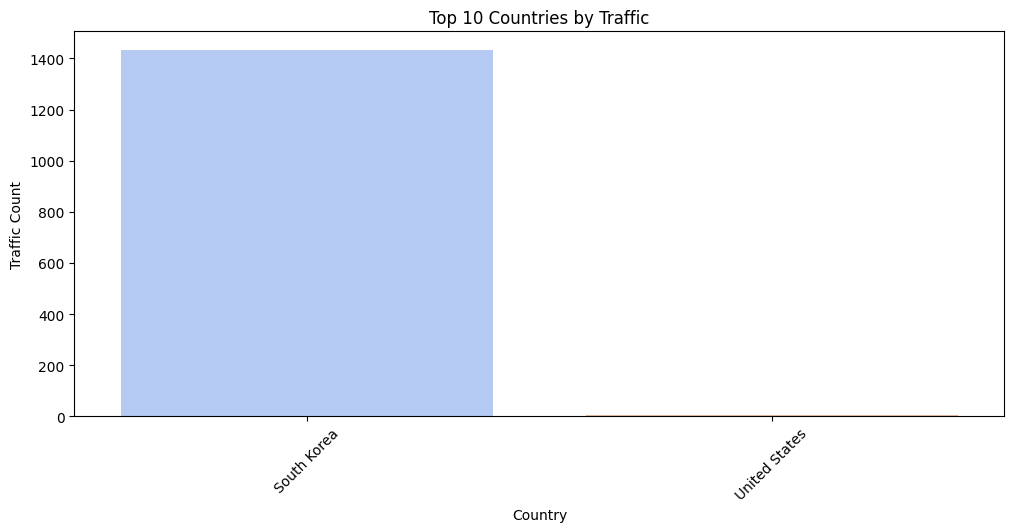

In [52]:
# 상위 10개 국가별 트래픽 수 계산
country_counts = df_ga_filtered['geo.geo_country'].value_counts().head(10)

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title("Top 10 Countries by Traffic")
plt.xlabel("Country")
plt.ylabel("Traffic Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-53-e7509847ad9f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="Blues_r")


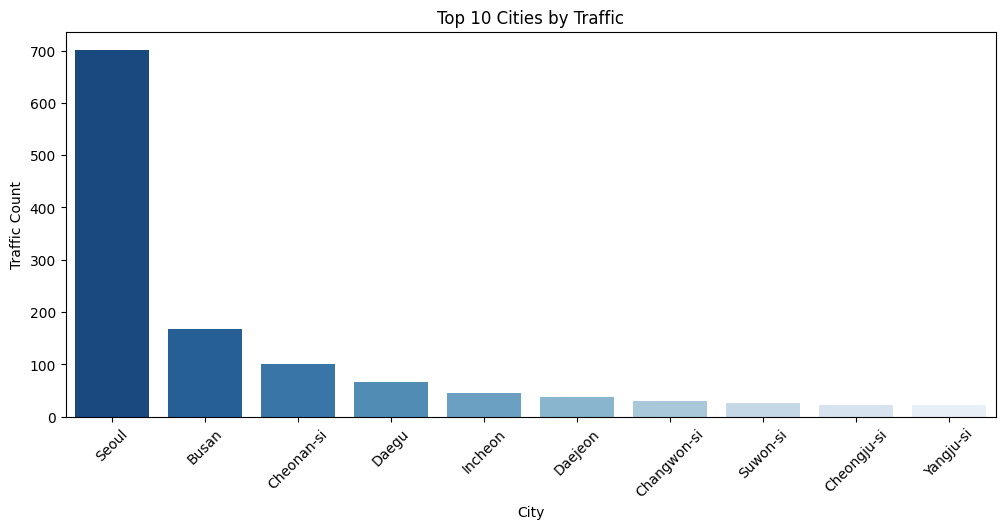

In [53]:
# 상위 10개 도시별 트래픽 수 계산
city_counts = df_ga_filtered['geo.geo_city'].value_counts().head(10)

# 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="Blues_r")
plt.title("Top 10 Cities by Traffic")
plt.xlabel("City")
plt.ylabel("Traffic Count")
plt.xticks(rotation=45)
plt.show()

In [49]:
columns_list = df_ga.columns
print(columns_list)

num_columns = len(df_ga.columns)
print(f"Total columns: {num_columns}")

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_previous_timestamp', 'event_value_in_usd',
       'event_bundle_sequence_id', 'event_server_timestamp_offset', 'user_id',
       'user_pseudo_id', 'privacy_info', 'user_properties',
       'user_first_touch_timestamp', 'user_ltv', 'device', 'geo', 'app_info',
       'traffic_source', 'stream_id', 'platform', 'event_dimensions',
       'ecommerce', 'items', 'collected_traffic_source', 'is_active_user',
       'batch_event_index', 'batch_page_id', 'batch_ordering_id',
       'session_traffic_source_last_click', 'publisher'],
      dtype='object')
Total columns: 30


In [20]:
df_ga['event_name'].value_counts().head(10)  # 가장 많이 발생한 이벤트 Top 10

,count
event_name,
screen_view,500
user_engagement,386
sign_up_step_click,127
scroll,100
style_recommend_click,66
session_start,41
fnb_tab_click,38
main_content_click,37
eot_start_click,25


,event_date,event_timestamp,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_first_touch_timestamp,stream_id,batch_event_index,...,collected_traffic_source.collected_traffic_source_manual_campaign_id,collected_traffic_source.collected_traffic_source_manual_medium,collected_traffic_source.collected_traffic_source_manual_term,collected_traffic_source.collected_traffic_source_manual_content,collected_traffic_source.collected_traffic_source_manual_source_platform,collected_traffic_source.collected_traffic_source_manual_creative_format,collected_traffic_source.collected_traffic_source_manual_marketing_tactic,collected_traffic_source.collected_traffic_source_gclid,collected_traffic_source.collected_traffic_source_dclid,collected_traffic_source.collected_traffic_source_srsltid
count,1440.0,1.440000e+03,1.301000e+03,0.0,1440.000000,1.440000e+03,834.000000,1.440000e+03,1.440000e+03,1440.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,20241113.0,1.731477e+15,1.730924e+15,NaN,153.092361,6.993021e+05,115513.395683,1.725835e+15,2.330073e+09,11.627778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,2.346659e+10,5.068038e+12,NaN,205.863487,5.300954e+06,38964.994957,1.793490e+13,1.288719e+04,13.098082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,20241113.0,1.731424e+15,1.621842e+15,NaN,2.000000,1.090000e+02,19947.000000,1.614087e+15,2.330053e+09,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20241113.0,1.731466e+15,1.731458e+15,NaN,7.000000,2.268280e+05,117468.000000,1.728823e+15,2.330053e+09,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20241113.0,1.731484e+15,1.731479e+15,NaN,38.000000,2.991165e+05,136163.000000,1.731060e+15,2.330081e+09,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,20241113.0,1.731495e+15,1.731495e+15,NaN,468.000000,3.849370e+05,136163.000000,1.731466e+15,2.330081e+09,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,20241113.0,1.731510e+15,1.731510e+15,NaN,523.000000,8.248770e+07,140171.000000,1.731509e+15,2.330081e+09,76.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,event_name,user_pseudo_id,platform,event_params.firebase_screen_class,event_params.firebase_event_origin,event_params.percent_scrolled,event_params.channel,event_params.message_type,event_params.firebase_previous_class,event_params.firebase_screen,...,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_type_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.creative_version,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_cost_structure,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.placement_name,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.rendering_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.site_id,session_traffic_source_last_click.session_traffic_source_last_click_cm360_campaign.site_name,publisher.publisher
count,1440,1440,1440,1416,1440,100,21,13,455,1248,...,1440,1440,1440,1440,1440,1440,1440,1440,1440,0
unique,32,103,2,7,4,5,5,1,8,48,...,1,1,1,1,1,1,1,1,1,0
top,screen_view,8AD0EDA3E1FF43669A39203848369A51,IOS,Flutter,app,20%,apple,display,Flutter,홈 화면,...,(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),(not set),NaN
freq,500,350,1026,1248,924,32,8,13,394,148,...,1440,1440,1440,1440,1440,1440,1440,1440,1440,NaN


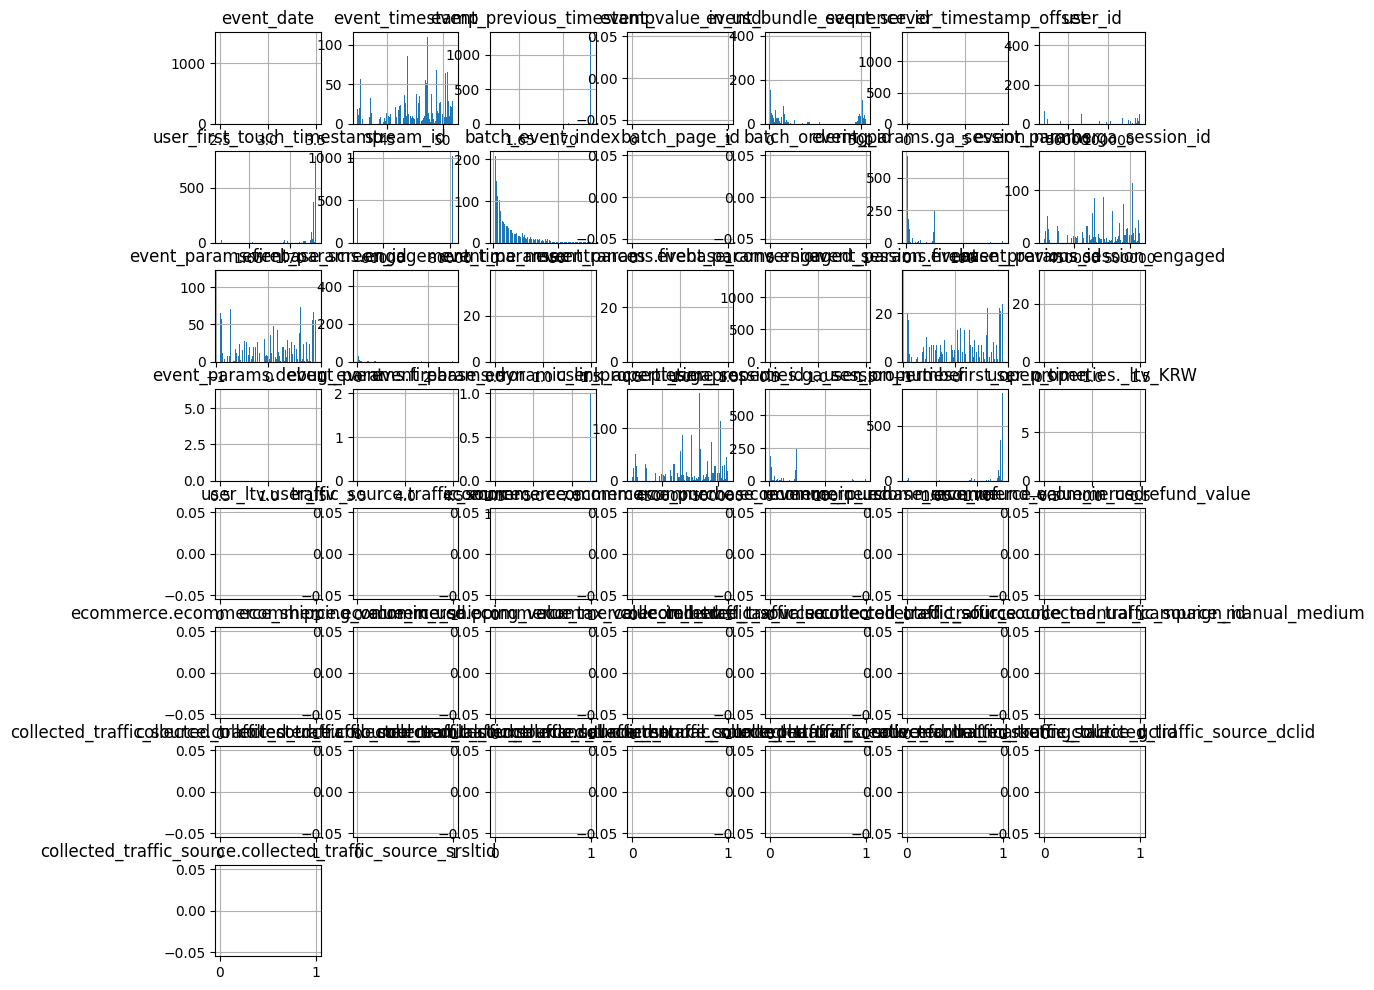

In [15]:
# prompt: 기초 기술 통계 작성

# Display descriptive statistics for numerical columns
display(df_ga_flattened.describe())

# Display descriptive statistics for categorical columns
display(df_ga_flattened.describe(include='object'))

# You can adjust the figsize and bins as needed
df_ga_flattened.hist(figsize=(12, 12), bins=100);

In [17]:
df['page_views'] = df.groupby('session_id')['event_name'].transform('count')

NameError: name 'df' is not defined